In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import riskfolio as rp

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2%}'.format

# Date range
start = '2000-01-01'
end = '2022-07-31'

# Tickers of assets
assets = """AXISBANK.NS	BPCL.NS	BRITANNIA.NS	CIPLA.NS	DRREDDY.NS	EICHERMOT.NS	GAIL.NS	HDFCBANK.NS	HINDALCO.NS	HINDUNILVR.NS	INFY.NS	IOC.NS	ITC.NS	M&M.NS	MARICO.NS	ONGC.NS	RELIANCE.NS	SAIL.NS	SBIN.NS	SIEMENS.NS	SUNPHARMA.NS	TATACONSUM.NS	TATAMOTORS.NS	TATAPOWER.NS	TATASTEEL.NS	TITAN.NS	VEDL.NS	WIPRO.NS""".split("\t")

#assets = [x + ".NS" for x in assets]
assets.sort()

# Downloading data
data = yf.download(assets, start=start, end=end)
data = data.loc[:, ('Adj Close', slice(None))]
data.columns = assets
Y = data[assets].pct_change().dropna()
display(Y.head())



[*********************100%***********************]  28 of 28 completed


,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,3.86%,-7.20%,-0.31%,0.54%,8.00%,5.22%,-3.42%,2.24%,3.79%,-1.15%,...,6.34%,0.29%,-1.34%,-2.41%,-3.94%,0.20%,-1.08%,-5.33%,-1.42%,8.00%
2000-01-05,-2.60%,-2.85%,-2.55%,-2.06%,-3.74%,8.07%,-4.75%,-3.94%,8.00%,-3.56%,...,-4.11%,-4.40%,-3.51%,-4.17%,2.43%,1.95%,3.81%,-6.11%,-0.61%,1.63%
2000-01-06,-2.48%,5.65%,6.85%,-5.52%,5.96%,8.01%,2.77%,0.81%,7.83%,4.01%,...,5.05%,1.44%,-0.10%,3.34%,4.15%,3.12%,7.47%,8.02%,4.65%,-1.93%
2000-01-07,-4.89%,-0.12%,8.00%,-7.99%,-7.97%,7.75%,-3.54%,0.03%,4.44%,5.45%,...,4.71%,-7.96%,-8.00%,7.97%,8.01%,-0.19%,2.20%,-2.11%,-2.35%,-8.00%
2000-01-10,3.09%,1.34%,7.51%,-3.34%,-1.65%,1.31%,-0.56%,-1.46%,-6.58%,0.76%,...,-1.39%,-1.82%,-4.59%,0.88%,7.90%,7.00%,5.99%,-0.99%,2.15%,0.14%


In [2]:
prices = data
display(prices.dropna().head())


,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,369.93%,1301.46%,5437.09%,10032.75%,32412.28%,289.18%,421.34%,1429.23%,5724.05%,13538.52%,...,1642.36%,4404.91%,1212.04%,3477.51%,3293.15%,430.95%,204.14%,698.82%,100.56%,8354.18%
2000-01-04,384.22%,1207.74%,5420.21%,10087.14%,35006.12%,304.27%,406.92%,1461.18%,5941.15%,13383.04%,...,1746.50%,4417.84%,1195.79%,3393.73%,3163.25%,431.79%,201.93%,661.56%,99.13%,9022.56%
2000-01-05,374.22%,1173.35%,5281.93%,9879.24%,33697.39%,328.84%,387.61%,1403.59%,6416.26%,12906.93%,...,1674.71%,4223.44%,1153.81%,3252.35%,3239.97%,440.21%,209.63%,621.17%,98.53%,9169.60%
2000-01-06,364.94%,1239.69%,5643.61%,9334.01%,35706.70%,355.18%,398.34%,1414.94%,6918.42%,13425.00%,...,1759.31%,4284.07%,1152.69%,3361.08%,3374.43%,453.97%,225.29%,670.99%,103.11%,8992.20%
2000-01-07,347.08%,1238.22%,6095.08%,8588.44%,32860.35%,382.71%,384.23%,1415.36%,7225.26%,14156.90%,...,1842.22%,3942.96%,1060.49%,3629.05%,3644.87%,453.13%,230.25%,656.85%,100.69%,8272.91%


In [3]:


# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

# Method to estimate expected returns based on historical data.
method_mu = 'hist'
# Method to estimate covariance matrix based on historical data.
method_cov = 'hist'

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
# Estimate optimal portfolio:
port.mu = pd.DataFrame(
     np.sqrt(np.diag(port.cov)).reshape(-1, 28), columns=assets)
# Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
model = 'Classic'
rm = 'MV'  # Risk measure used, this time will be variance
obj = 'Sharpe'  # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True  # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0  # Risk aversion factor, only useful when obj is 'Utility'

w1 = port.optimization(model=model, rm=rm,
                       obj=obj, rf=rf, l=l, hist=hist)
# Estimate points in the efficient frontier mean - semi standard deviation

# Estimate the risk parity portfolio for semi standard deviation
display(w1.T)


,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
weights,2.85%,0.00%,2.30%,2.16%,10.66%,4.21%,0.00%,4.06%,0.83%,9.67%,...,0.00%,2.46%,10.76%,1.66%,1.48%,1.12%,4.49%,5.53%,2.91%,1.63%


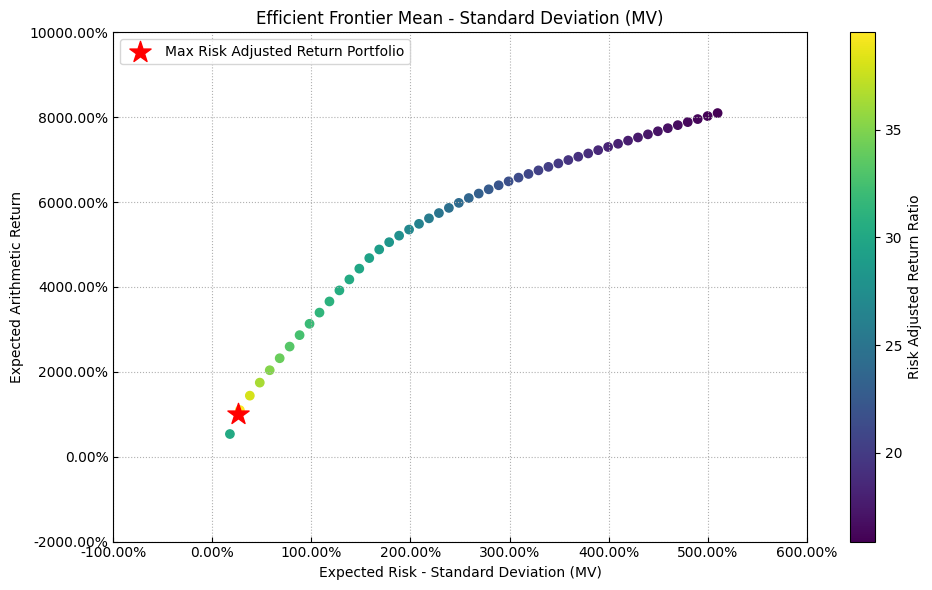

In [4]:
label = 'Max Risk Adjusted Return Portfolio'  # Title of point
mu = port.mu  # Expected returns
cov = port.cov  # Covariance matrix
returns = port.returns  # Returns of the assets

ws = port.efficient_frontier(
    model=model, rm=rm, points=50, rf=rf, hist=hist)

ef_graph = rp.plot_frontier(w_frontier=ws, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w1, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)


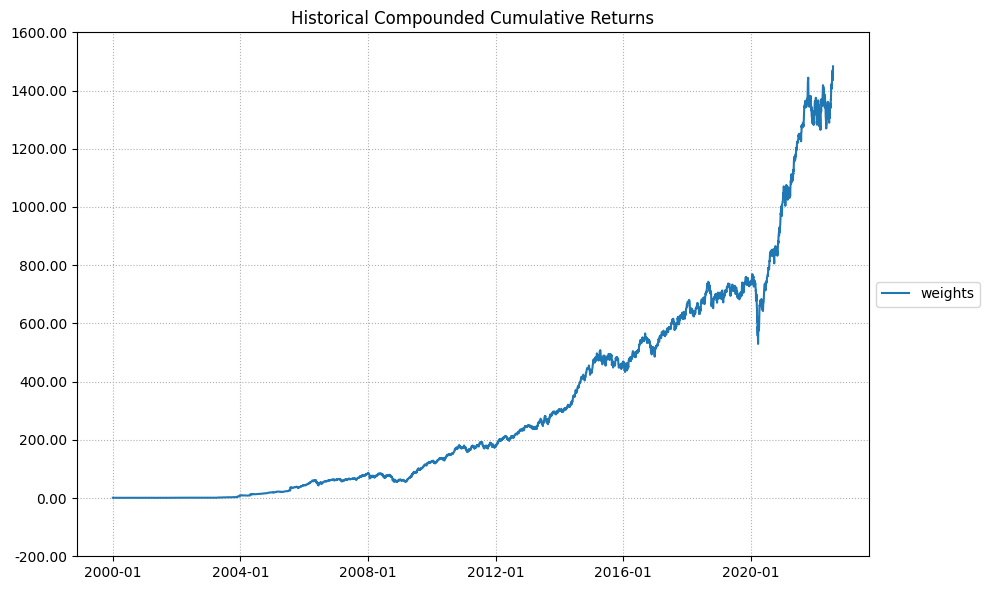

In [5]:
cagr_graph = rp.plot_series(returns=Y, w=w1, cmap='tab20', height=6, width=10,
                    ax=None)


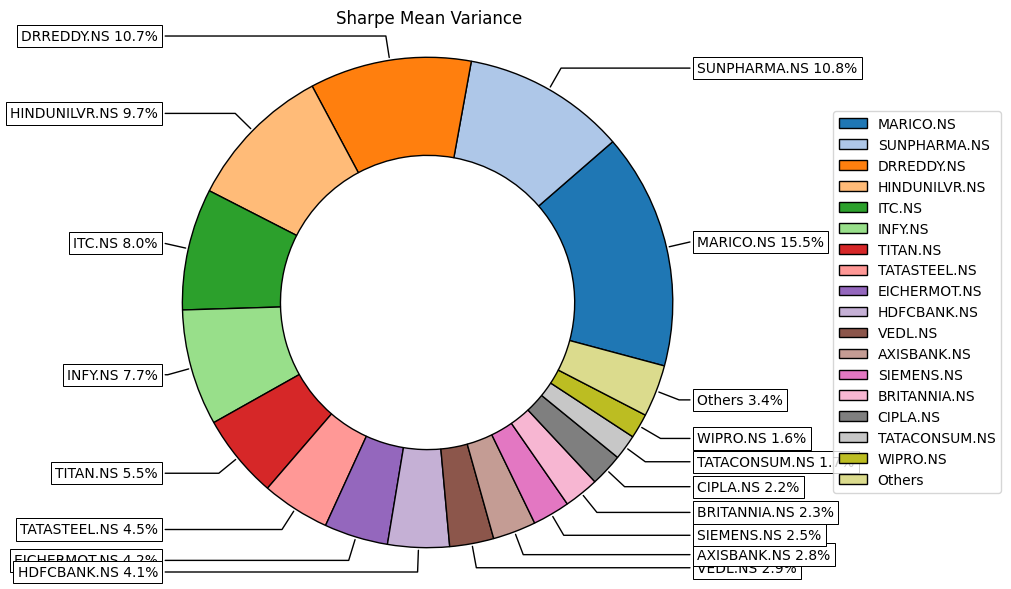

In [7]:
ax = rp.plot_pie(w=w1, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap="tab20",
                 height=6, width=10, ax=None)


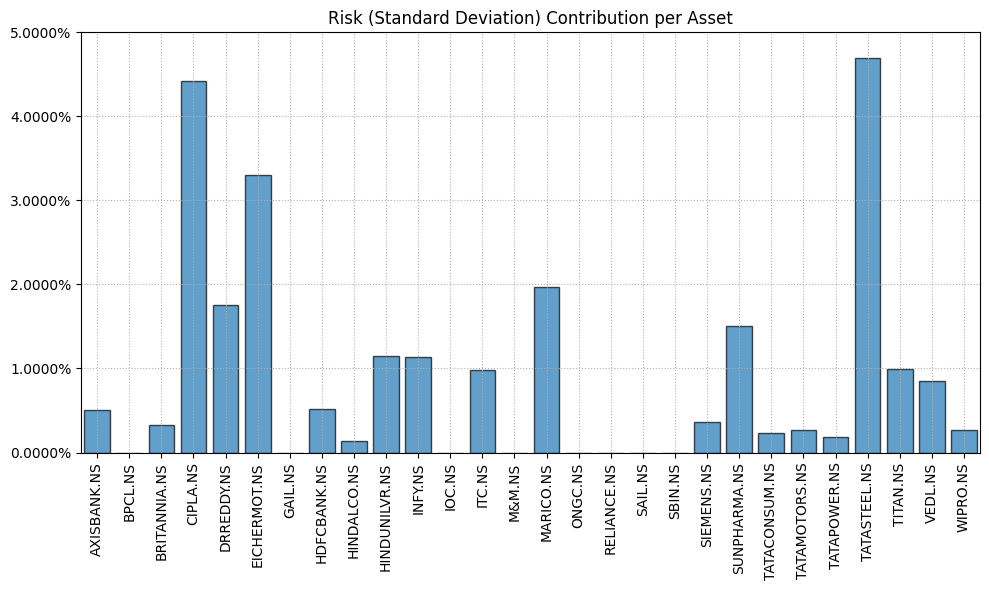

In [8]:
ax = rp.plot_risk_con(w=w1, cov=cov, returns=Y, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None)


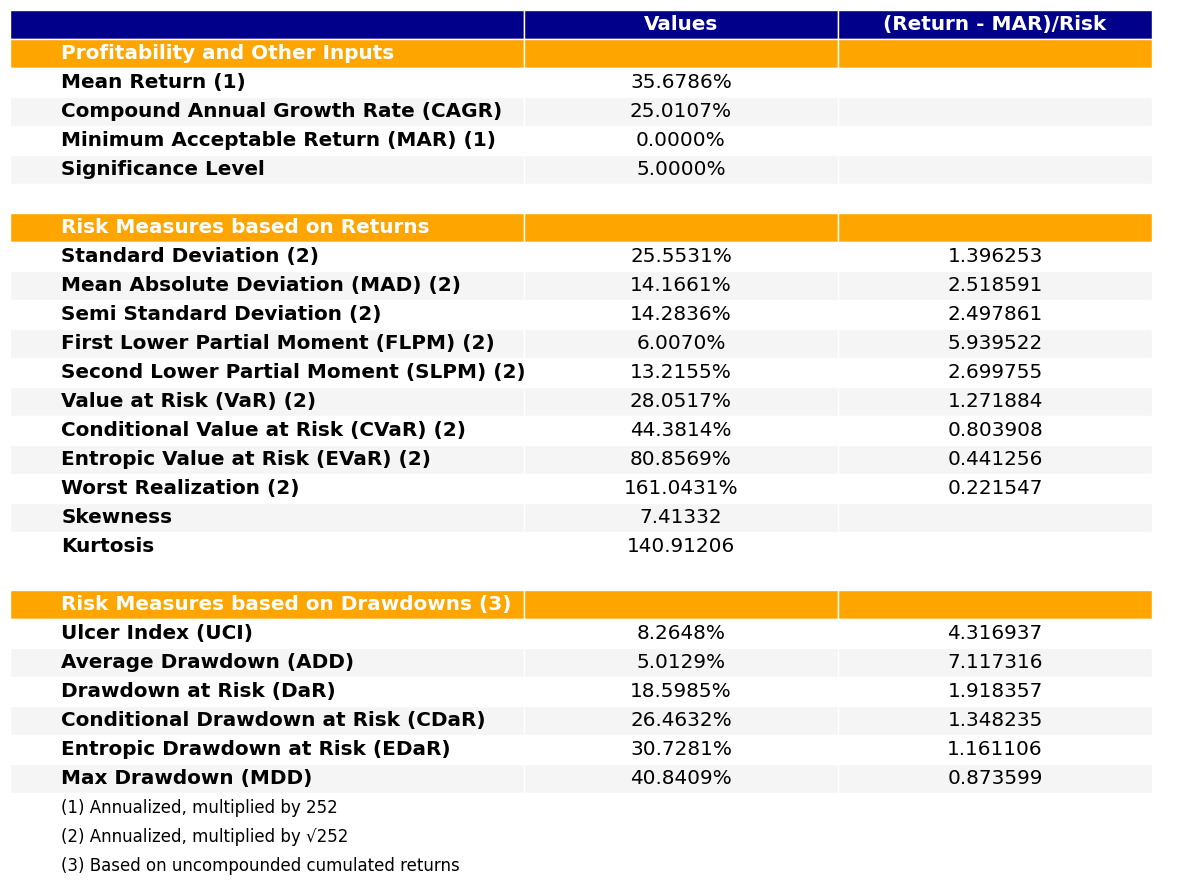

In [9]:
ax = rp.plot_table(returns=Y, w=w1, MAR=0, alpha=0.05, ax=None)


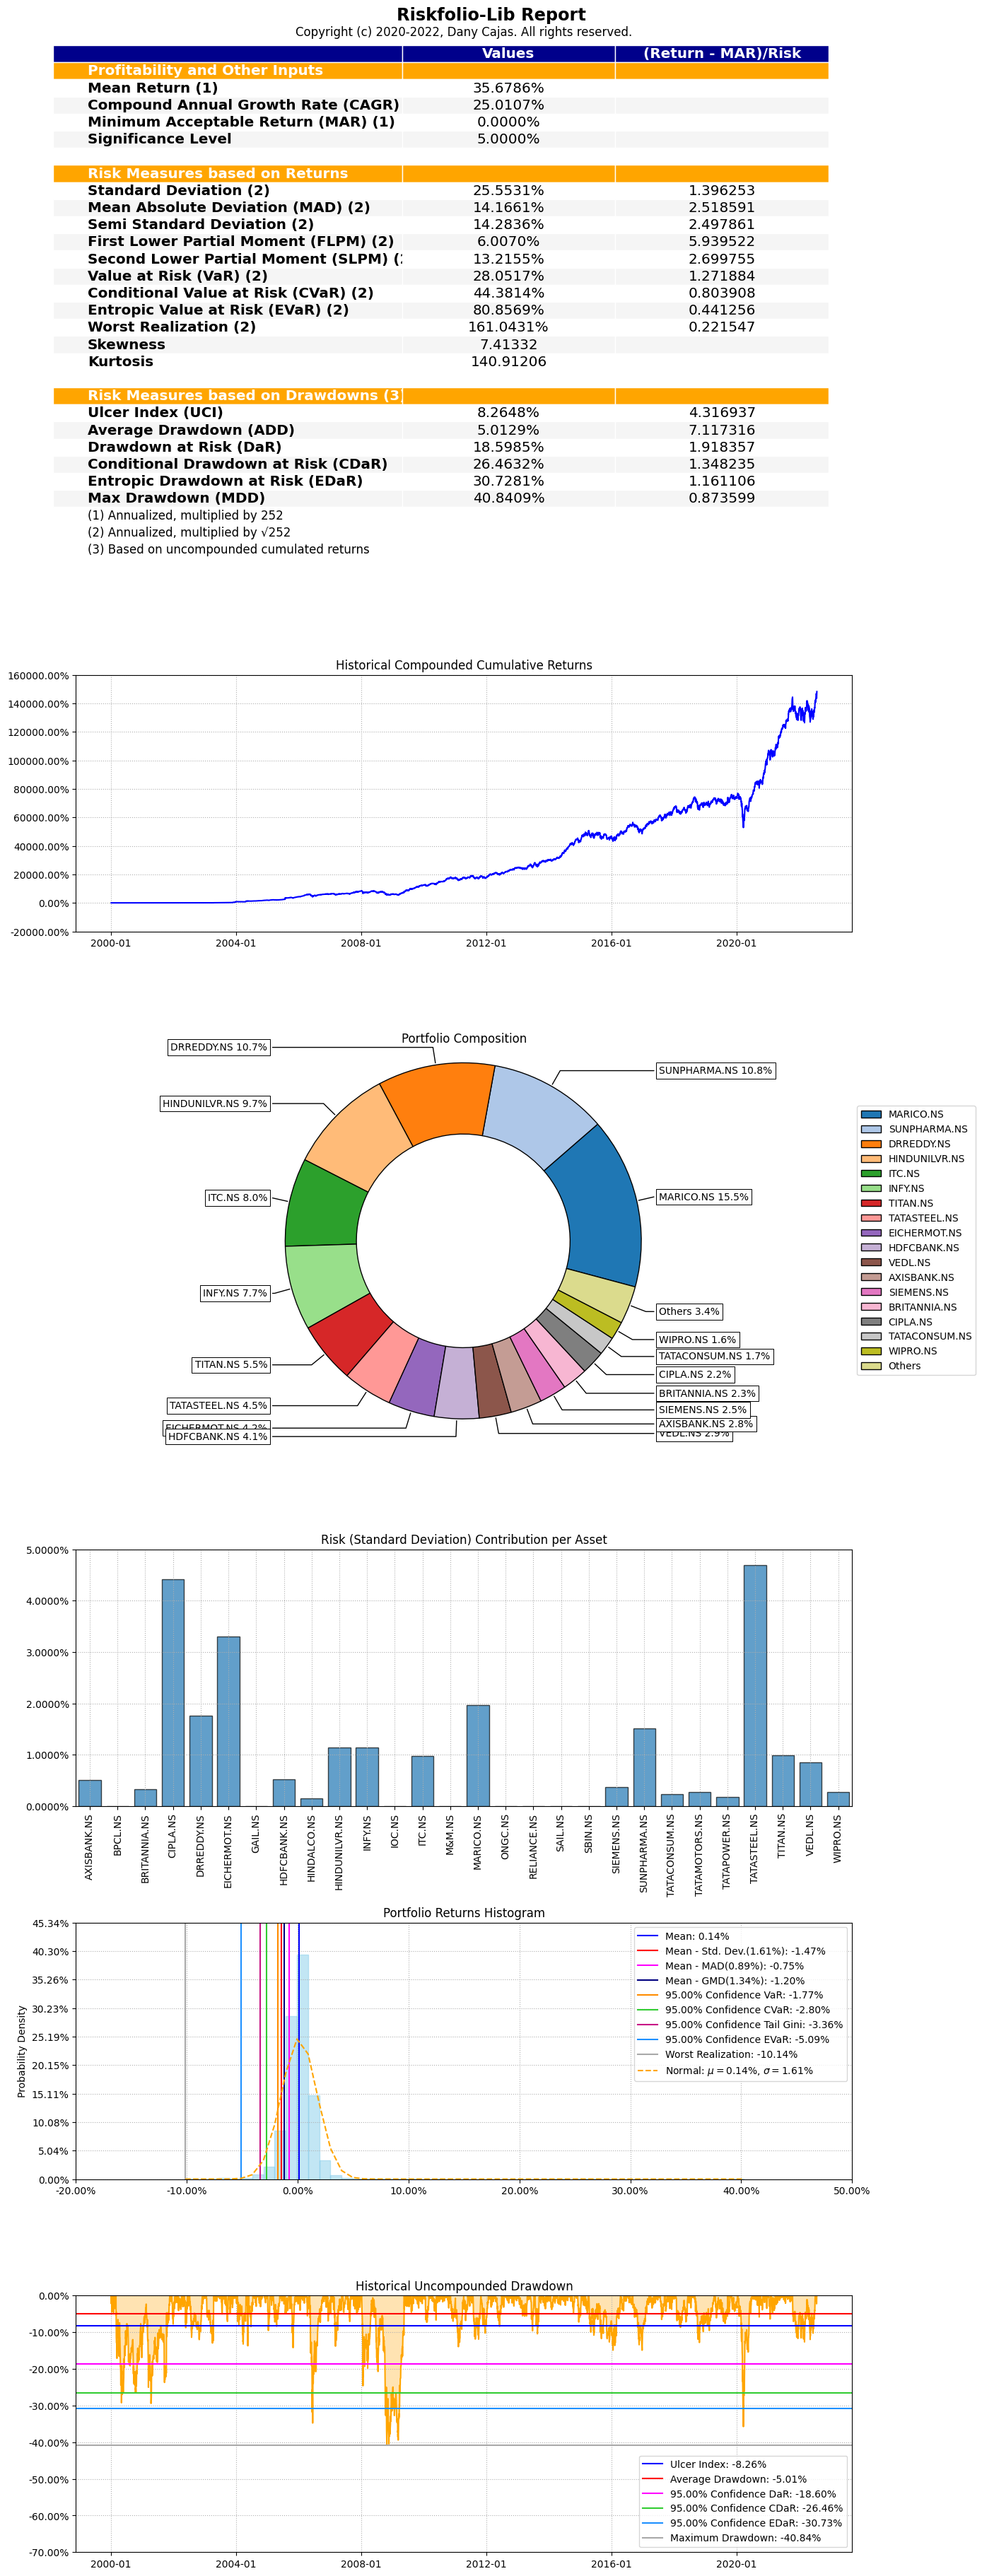

In [10]:
ax = rp.jupyter_report(returns=Y,
                       w=w1,
                       rm=rm,
                       rf=0,
                       alpha=0.05,
                       others=0.05,
                       nrow=25,
                       height=6,
                       width=14,
                       t_factor=252,
                       ini_days=1,
                       days_per_year=252,
                       bins=50,
                       )


In [11]:
rp.excel_report(returns=Y,
                w=w1,
                rf=0,
                alpha=0.05,
                t_factor=252,
                ini_days=1,
                days_per_year=252,
                name="report")
